In [1]:
from proj1_helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read train_y=LABELS, train_x=FEATURES and train_id=EVENT_IDS from dataset.
subsamp = False
y, x, id_ = load_csv_data('../data/train.csv', sub_sample=subsamp)
y_out_test, x_out_test, id_out_test = load_csv_data('../data/test.csv', sub_sample=subsamp)

In [29]:
clean=True
degree = 2
feature_expansion = True
x_train, y_train, x_test, y_test = split_data(x, y, ratio=0.9999, seed = 42)
if clean:
    # Clean data
    y_train, x_train = clean_data(y_train, x_train)
    y_test, x_test = clean_data(y_test, x_test)
# Standardize data
x_train_std = standardize_features(x_train)
x_test_std = standardize_features(x_test)
x_train = x_train_std[0]
x_test = x_test_std[0]
# Build data matrix
tx_train = build_poly(x_train, degree)
tx_test = build_poly(x_test, degree)
tx_train.shape, tx_test.shape


((249975, 61), (25, 61))

# Gradient Descent

In [30]:
w_init = np.array([0] * tx_train.shape[1])
max_iter = 400
gamma = 0.0009
w_gd, loss_gd = least_squares_GD(y_train,
                                 tx_train,
                                 w_init,
                                 max_iter,
                                 gamma,
                                 pr=True,
                                 adapt_gamma=False,
                                 kind='mse',
                                accel=True)
gd_prediction = predict_labels(w_gd, tx_test)
acc_gd = accuracy_ratio(gd_prediction, y_test)
print('Accuracy ratio = %.3f' % acc_gd)
print('Test loss = %.3f' % compute_loss(y_test, tx_test, w_gd))
print('Train loss = %.3f' % loss_gd)

GD (0/399): loss=0.5
GD (100/399): loss=0.33137314079292335
GD (200/399): loss=0.32340400485531934
GD (300/399): loss=0.31886610427104434
Accuracy ratio = 0.720
Test loss = 0.296
Train loss = 0.318


np.savetxt('../data/w_gd_acc.dat', w_gd)

# Stochastic Gradient Descent

In [20]:
w_init = np.array([0] * tx_train.shape[1])
max_iter = 5000
gamma = 1e-4
batch_size = 1

w_sgd, loss_sgd = least_squares_SGD(y_train,
                                    tx_train,
                                    w_init,
                                    batch_size,
                                    max_iter,
                                    gamma,
                                    pr=True,
                                    adapt_gamma=False,
                                    choose_best=True)
sgd_prediction = predict_labels(w_sgd, tx_test)
acc_sgd = accuracy_ratio(sgd_prediction, y_test)
print('Accuracy ratio = %.2f' % acc_sgd)
print('Test loss = %.2e' % compute_loss(y_test, tx_test, w_sgd))
print('Train loss = %.2e' % loss_sgd)

SGD (0/4999): loss=0.5
SGD (100/4999): loss=0.5173437266806135
SGD (200/4999): loss=0.33062343009174205
SGD (300/4999): loss=0.3728576608433112
SGD (400/4999): loss=0.24583096308033078
SGD (500/4999): loss=0.43677362541311726
SGD (600/4999): loss=0.26135118321843037
SGD (700/4999): loss=0.1735789529757717
SGD (800/4999): loss=0.21173991131173056
SGD (900/4999): loss=0.26301353068633315
SGD (1000/4999): loss=0.20051125485740304
SGD (1100/4999): loss=0.6233369267651774
SGD (1200/4999): loss=0.2667718787517875
SGD (1300/4999): loss=0.17189326432032265
SGD (1400/4999): loss=0.3340363100165612
SGD (1500/4999): loss=0.8033371959348209
SGD (1600/4999): loss=0.30138279695032477
SGD (1700/4999): loss=0.20927274870467477
SGD (1800/4999): loss=0.18368135633742547
SGD (1900/4999): loss=0.35534302384458655
SGD (2000/4999): loss=0.32953766300015486
SGD (2100/4999): loss=0.8633827686694955
SGD (2200/4999): loss=0.37720704000892796
SGD (2300/4999): loss=0.17848917190100802
SGD (2400/4999): loss=0.5070

# Least Squares

In [31]:
w_lsq, loss_lsq = least_squares(y_train, tx_train)
lsq_prediction = predict_labels(w_lsq, tx_test)
acc_lsq = accuracy_ratio(lsq_prediction, y_test)
print('Accuracy ratio = %.2f' % acc_lsq)
print('Train loss = %.2f' % loss_lsq)
print('Test loss = %.2e' % compute_loss(y_test, tx_test, w_lsq))

Accuracy ratio = 0.48
Train loss = 0.32
Test loss = 5.97e+02


np.savetxt('../data/w_lsq.dat', w_lsq)

# Ridge Regression

In [37]:
lambda_ = 3.3e-2
w_rr, loss_rr = ridge_regression(y_train, tx_train, lambda_)
rr_prediction = predict_labels(w_rr, tx_test)
acc_rr = accuracy_ratio(rr_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_rr)
print('Test loss = %.3f'%compute_loss(y_test, tx_test, w_rr))
print('Train loss = %.3f'%loss_rr)

Accuracy ratio = 0.680
Test loss = 0.317
Train loss = 0.319


np.savetxt('../data/w_rr.dat', w_rr)

In [33]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 3, 50)
    # split the data, and return train and test data
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    #Clean
    if clean:
        y_train, x_train = clean_data(y_train, x_train)
        y_test, x_test = clean_data(y_test, x_test)
    # form train and test data with offset column
    x_train_std = standardize_features(x_train)[0]
    x_test_std = standardize_features(x_test)[0]
    tx_train=build_poly(x_train_std, degree)
    tx_test=build_poly(x_test_std, degree)
    rmse_tr = []
    rmse_te = []
    accuracies = []
    for ind, lambda_ in enumerate(lambdas):
        # calcualte weight through least square.
        w_train, loss_train = ridge_regression(y_train, tx_train, lambda_)
        rmse_tr.append(np.sqrt(2*loss_train))
        rmse_te.append(np.sqrt(2*compute_loss(y_test, tx_test, w_train, kind = 'mse')))
        accuracies.append(accuracy_ratio(predict_labels(w_train, tx_test), y_test))
        print("proportion={p}, degree={d}, lambda={l:.3e}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}, Accuracy={ac:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind], ac=accuracies[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
    plt.figure()
    plt.semilogx(lambdas,accuracies, marker='o')
def plot_train_test(train_errors, test_errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(lambdas, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("../results/ridge_regression")

proportion=0.9, degree=2, lambda=1.000e-05, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.774
proportion=0.9, degree=2, lambda=1.456e-05, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.774
proportion=0.9, degree=2, lambda=2.121e-05, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.774
proportion=0.9, degree=2, lambda=3.089e-05, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.774
proportion=0.9, degree=2, lambda=4.498e-05, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.774
proportion=0.9, degree=2, lambda=6.551e-05, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.774
proportion=0.9, degree=2, lambda=9.541e-05, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.774
proportion=0.9, degree=2, lambda=1.389e-04, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.773
proportion=0.9, degree=2, lambda=2.024e-04, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.774
proportion=0.9, degree=2, lambda=2.947e-04, Training RMSE=0.794, Testing RMSE=0.794, Accuracy=0.773


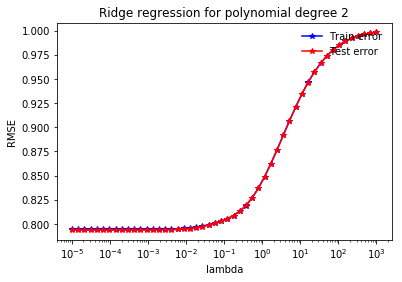

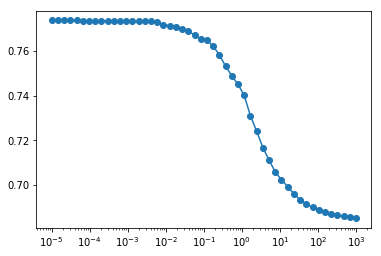

In [34]:
seed = 42
degree = 2
split_ratio = 0.9
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [35]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    id_test = k_indices[k]
    id_train = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    x_test = x[id_test]
    x_train = x[id_train]
    y_test = y[id_test]
    y_train = y[id_train]
    #Clean
    if clean:
        y_train, x_train = clean_data(y_train, x_train)
        y_test, x_test = clean_data(y_test, x_test)
    # Standardize
    x_train_std = standardize(x_train)[0]
    x_test_std = standardize(x_test)[0]
    # Define feature matrix
    tx_train = build_poly(x_train_std, degree)
    tx_test = build_poly(x_test_std, degree)
    # ridge regression
    weight, loss_tr = ridge_regression(y_train, tx_train, lambda_)
    # calculate the loss for train and test data
    loss_te = compute_loss(y_test, tx_test, weight)
    accuracy = accuracy_ratio(predict_labels(weight, tx_test), y_test)

    return loss_tr, loss_te, accuracy

Best lambda from accuracy: 1.00e-07
Best lambda from error: 3.29e-02


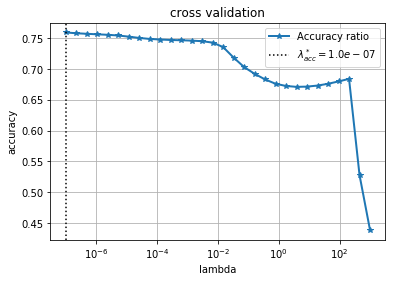

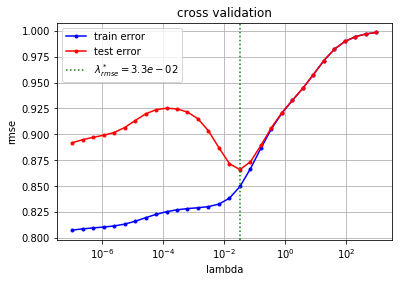

In [36]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    best_l_err = lambds[np.argmin(mse_te)]
    print('Best lambda from error: %.2e'%best_l_err)
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.axvline(best_l_err, c = 'g', label = '$\lambda^*_{rmse}=%.1e$'%best_l_err, ls = ':')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("../results/cross_validation")
def cross_validation_visualization_accuracy(lambdas, accuracies):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambdas, accuracies, lw =2, marker = '*', label = 'Accuracy ratio')
    best_l_acc = lambdas[np.argmax(accuracies)]
    plt.axvline(best_l_acc, c= 'k', label = '$\lambda^*_{acc}=%.1e$'%best_l_acc, ls = ':')
    print('Best lambda from accuracy: %.2e'%best_l_acc)
    plt.xlabel("lambda")
    plt.ylabel("accuracy")
    plt.title("cross validation")
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("../results/cross_validation_accuracies")
def cross_validation_demo():
    seed = 42
    degree = 2
    k_fold = 4
    lambdas = np.logspace(-7, 3, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    std_tr = []
    std_te = []
    accuracies = []
    # cross validation
    for ind, lambda_ in enumerate(lambdas):
        x_validation = np.array([cross_validation(y, x, k_indices, k, lambda_, degree) for k in range(k_fold)])
        rmse_tr.append(np.mean(np.sqrt(2 * x_validation[:, 0])))
        rmse_te.append(np.mean(np.sqrt(2 * x_validation[:, 1])))
        std_tr.append(np.std(np.sqrt(2 * x_validation[:, 0])))
        std_te.append(np.std(np.sqrt(2 * x_validation[:, 1])))
        accuracies.append(np.mean(x_validation[:,2]))
    cross_validation_visualization_accuracy(lambdas, accuracies)
    plt.figure()
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()


# Bias-Variance test

In [31]:
def bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te):
    """visualize the bias variance decomposition."""
    rmse_tr_mean = np.expand_dims(np.mean(rmse_tr, axis=0), axis=0)
    rmse_te_mean = np.expand_dims(np.mean(rmse_te, axis=0), axis=0)
    print(rmse_te_mean, rmse_tr_mean)
    plt.plot(degrees,
             rmse_tr.T,
             'b',
             linestyle="-",
             color=([0.7, 0.7, 1]),
             label='train',
             linewidth=0.3)
    plt.plot(degrees,
             rmse_te.T,
             'r',
             linestyle="-",
             color=[1, 0.7, 0.7],
             label='test',
             linewidth=0.3)
    plt.plot(degrees,
             rmse_tr_mean.T,
             'b',
             linestyle="-",
             label='train',
             linewidth=3)
    plt.plot(degrees,
             rmse_te_mean.T,
             'r',
             linestyle="-",
             label='test',
             linewidth=3)
    plt.ylim(0.7, 1)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.title("Bias-Variance Decomposition")
    plt.savefig("bias_variance")


def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    ratio_train = 0.5
    degrees = range(1, 8)
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        # split data with a specific seed
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
        x_train_std = standardize(x_train)[0]
        x_test_std = standardize(x_test)[0]
        for index_degrees, degree in enumerate(degrees):
            tx_train = build_poly(x_train_std, degree)
            tx_test = build_poly(x_test_std, degree)
            weight, loss_tr = ridge_regression(y_train, tx_train, 1.89e-05 )
            loss_te = compute_loss(y_test, tx_test, weight, kind='mse')
            rmse_tr[index_seed, index_degrees] = np.sqrt(2 * loss_tr)
            rmse_te[index_seed, index_degrees] = np.sqrt(2 * loss_te)
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)


bias_variance_demo()

KeyboardInterrupt: 

In [34]:
print(id_out_test.shape)
x_out_test_std = standardize_features(x_out_test)
x_out = x_out_test_std[0]
tx_out = build_poly(x_out, 2)

create_csv_submission(id_out_test, predict_labels(w_rr, tx_out) , '../results/rr_pred.csv')
create_csv_submission(id_out_test, predict_labels(w_gd, tx_out) , '../results/gd_pred_accel.csv')
create_csv_submission(id_out_test, predict_labels(w_lsq, tx_out) , '../results/lsq_pred.csv')
#create_csv_submission(id_out_test, predict_labels(w_sgd, tx_out) , '../results/sgd_pred_noadapt.csv')

(568238,)


# Logistic Regression

In [38]:
def predict_labels_log(weights, data):
    """Generates class predictions given weights, and a test data matrix"""
    y_pred = np.dot(data, weights)
    y_pred[np.where(y_pred <= 0.5)] = -1
    y_pred[np.where(y_pred > 0.5)] = 1

    return y_pred

In [39]:
y_train_log = np.copy(y_train)
y_train_log[y_train == -1] = 0

y_test_log = np.copy(y_test)
y_test_log[y_test == -1] = 0

w_init = np.array([0] * tx_train.shape[1])
max_iter = 400
gamma = 1e-6
w_lrgd, loss_lrgd = logistic_regression(y_train_log,
                                        tx_train,
                                        w_init,
                                        max_iter,
                                        gamma,
                                        pr=True,
                                        adapt_gamma=False,
                                       accel=True)

lrgd_prediction = predict_labels_log(w_lrgd, tx_test)
print(tx_test.dot(w_lrgd))
acc_lrgd = accuracy_ratio(lrgd_prediction, y_test)

print('Accuracy ratio = %.3f' % acc_lrgd)
print('Test loss = %.3f' % compute_loss_logistic(y_test_log, tx_test, w_lrgd))
print('Train loss = %.3f' % loss_lrgd)

UnboundLocalError: local variable 'w_bar' referenced before assignment

In [40]:
lambda_ = 500
gamma = 1e-7
w_rlrgd, loss_rlrgd = reg_logistic_regression(y_train_log,
                                              tx_train,
                                              lambda_,
                                              w_init,
                                              max_iter,
                                              gamma,
                                              pr=True,
                                              adapt_gamma=False, 
                                              accel=False)
rlrgd_prediction = predict_labels_log(w_rlrgd, tx_test)
acc_rlrgd = accuracy_ratio(rlrgd_prediction, y_test)
print('Accuracy ratio = %.3f' % acc_rlrgd)
print('Test loss = %.3f' % compute_loss_logistic(y_test_log, tx_test, w_rlrgd))
print('Train loss = %.3f' % loss_rlrgd)

 Regularized Logistic Regression GD (0/399): loss=173269.466460989
 Regularized Logistic Regression GD (100/399): loss=125009.66602998153
 Regularized Logistic Regression GD (200/399): loss=119068.38676597021
 Regularized Logistic Regression GD (300/399): loss=116520.99870399895
Accuracy ratio = 0.760
Test loss = 10.842
Train loss = 115192.766


def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    gamma = 1e-8
    # get k'th subgroup in test, others in train
    id_test = k_indices[k]
    id_train = k_indices[~(np.arange(k_indices.shape[0]) == k)].reshape(-1)
    x_test = x[id_test]
    x_train = x[id_train]
    y_test = y[id_test]
    y_train = y[id_train]
    #Clean
    if clean:
        y_train, x_train = clean_data(y_train, x_train)
        y_test, x_test = clean_data(y_test, x_test)
    # Standardize
    x_train_std = standardize(x_train)[0]
    x_test_std = standardize(x_test)[0]
    # Define feature matrix
    tx_train = build_poly(x_train_std, degree)
    tx_test = build_poly(x_test_std, degree)
    y_train_log = np.copy(y_train)
    y_train_log[y_train == -1] = 0

    y_test_log = np.copy(y_test)
    y_test_log[y_test == -1] = 0
    # logistic regression
    weight, loss_tr = reg_logistic_regression(y_train_log,
                                              tx_train,
                                              lambda_,
                                              w_init,
                                              max_iter,
                                              gamma,
                                              pr=True,
                                              adapt_gamma=False)
    # calculate the loss for train and test data
    loss_te = compute_loss_logistic(y_test, tx_test, weight)
    accuracy = accuracy_ratio(predict_labels(weight, tx_test), y_test)

    return loss_tr, loss_te, accuracy

 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2590.424676956365
 Regularized Logistic Regression GD (200/3999): loss=2582.527937577399
 Regularized Logistic Regression GD (300/3999): loss=2575.368552847789
 Regularized Logistic Regression GD (400/3999): loss=2568.780904032578
 Regularized Logistic Regression GD (500/3999): loss=2562.6448385416898
 Regularized Logistic Regression GD (600/3999): loss=2556.8724341413717
 Regularized Logistic Regression GD (700/3999): loss=2551.398675044787
 Regularized Logistic Regression GD (800/3999): loss=2546.174884591752
 Regularized Logistic Regression GD (900/3999): loss=2541.1641459193565
 Regularized Logistic Regression GD (1000/3999): loss=2536.338101679504
 Regularized Logistic Regression GD (1100/3999): loss=2531.67469777888
 Regularized Logistic Regression GD (1200/3999): loss=2527.1565742708344
 Regularized Logistic Regression GD (1300/3999): loss=2522.7699036668982

 Regularized Logistic Regression GD (3500/3999): loss=2439.750491358589
 Regularized Logistic Regression GD (3600/3999): loss=2437.117749927169
 Regularized Logistic Regression GD (3700/3999): loss=2434.535128731349
 Regularized Logistic Regression GD (3800/3999): loss=2432.0013948015985
 Regularized Logistic Regression GD (3900/3999): loss=2429.5153620201713
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2587.984238979349
 Regularized Logistic Regression GD (200/3999): loss=2578.347880933269
 Regularized Logistic Regression GD (300/3999): loss=2569.895495219469
 Regularized Logistic Regression GD (400/3999): loss=2562.333773595912
 Regularized Logistic Regression GD (500/3999): loss=2555.4575690830497
 Regularized Logistic Regression GD (600/3999): loss=2549.1208224311563
 Regularized Logistic Regression GD (700/3999): loss=2543.2176122334013
 Regularized Logistic Regression GD (800/3999): loss=2537.6696319147

 Regularized Logistic Regression GD (2900/3999): loss=2463.21963139489
 Regularized Logistic Regression GD (3000/3999): loss=2460.1984662727155
 Regularized Logistic Regression GD (3100/3999): loss=2457.237757195549
 Regularized Logistic Regression GD (3200/3999): loss=2454.3359393140768
 Regularized Logistic Regression GD (3300/3999): loss=2451.4915067624197
 Regularized Logistic Regression GD (3400/3999): loss=2448.703006966689
 Regularized Logistic Regression GD (3500/3999): loss=2445.9690360430977
 Regularized Logistic Regression GD (3600/3999): loss=2443.288235052711
 Regularized Logistic Regression GD (3700/3999): loss=2440.659286929084
 Regularized Logistic Regression GD (3800/3999): loss=2438.080913933334
 Regularized Logistic Regression GD (3900/3999): loss=2435.551875522341
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2588.6364896758946
 Regularized Logistic Regression GD (200/3999): loss=2579.29321

 Regularized Logistic Regression GD (2300/3999): loss=2484.4149462342357
 Regularized Logistic Regression GD (2400/3999): loss=2481.0284002235217
 Regularized Logistic Regression GD (2500/3999): loss=2477.711546746118
 Regularized Logistic Regression GD (2600/3999): loss=2474.4622773703013
 Regularized Logistic Regression GD (2700/3999): loss=2471.2786270052015
 Regularized Logistic Regression GD (2800/3999): loss=2468.1587510245354
 Regularized Logistic Regression GD (2900/3999): loss=2465.1009070594387
 Regularized Logistic Regression GD (3000/3999): loss=2462.103440473617
 Regularized Logistic Regression GD (3100/3999): loss=2459.1647727480354
 Regularized Logistic Regression GD (3200/3999): loss=2456.283392166841
 Regularized Logistic Regression GD (3300/3999): loss=2453.4578463256876
 Regularized Logistic Regression GD (3400/3999): loss=2450.686736083066
 Regularized Logistic Regression GD (3500/3999): loss=2447.968710655101
 Regularized Logistic Regression GD (3600/3999): loss=24

 Regularized Logistic Regression GD (1700/3999): loss=2497.253847573885
 Regularized Logistic Regression GD (1800/3999): loss=2493.4506659427707
 Regularized Logistic Regression GD (1900/3999): loss=2489.7458381414126
 Regularized Logistic Regression GD (2000/3999): loss=2486.133510193332
 Regularized Logistic Regression GD (2100/3999): loss=2482.60864821326
 Regularized Logistic Regression GD (2200/3999): loss=2479.1668832595387
 Regularized Logistic Regression GD (2300/3999): loss=2475.8043883798114
 Regularized Logistic Regression GD (2400/3999): loss=2472.517780644318
 Regularized Logistic Regression GD (2500/3999): loss=2469.3040427137903
 Regularized Logistic Regression GD (2600/3999): loss=2466.1604597782352
 Regularized Logistic Regression GD (2700/3999): loss=2463.0845686603566
 Regularized Logistic Regression GD (2800/3999): loss=2460.0741165967615
 Regularized Logistic Regression GD (2900/3999): loss=2457.1270277539425
 Regularized Logistic Regression GD (3000/3999): loss=24

 Regularized Logistic Regression GD (1100/3999): loss=2523.4308357624386
 Regularized Logistic Regression GD (1200/3999): loss=2518.7721094298176
 Regularized Logistic Regression GD (1300/3999): loss=2514.279411228471
 Regularized Logistic Regression GD (1400/3999): loss=2509.9352218437857
 Regularized Logistic Regression GD (1500/3999): loss=2505.7252469986365
 Regularized Logistic Regression GD (1600/3999): loss=2501.637721918378
 Regularized Logistic Regression GD (1700/3999): loss=2497.6628796381083
 Regularized Logistic Regression GD (1800/3999): loss=2493.7925413241164
 Regularized Logistic Regression GD (1900/3999): loss=2490.019798272147
 Regularized Logistic Regression GD (2000/3999): loss=2486.3387633769717
 Regularized Logistic Regression GD (2100/3999): loss=2482.7443756729353
 Regularized Logistic Regression GD (2200/3999): loss=2479.2322457247724
 Regularized Logistic Regression GD (2300/3999): loss=2475.7985326851817
 Regularized Logistic Regression GD (2400/3999): loss=

 Regularized Logistic Regression GD (500/3999): loss=2561.895629331835
 Regularized Logistic Regression GD (600/3999): loss=2556.055111975908
 Regularized Logistic Regression GD (700/3999): loss=2550.515722993471
 Regularized Logistic Regression GD (800/3999): loss=2545.228044803704
 Regularized Logistic Regression GD (900/3999): loss=2540.154874990118
 Regularized Logistic Regression GD (1000/3999): loss=2535.2678018022666
 Regularized Logistic Regression GD (1100/3999): loss=2530.5448260903695
 Regularized Logistic Regression GD (1200/3999): loss=2525.968687018486
 Regularized Logistic Regression GD (1300/3999): loss=2521.5256663424084
 Regularized Logistic Regression GD (1400/3999): loss=2517.2047226677355
 Regularized Logistic Regression GD (1500/3999): loss=2512.9968566151915
 Regularized Logistic Regression GD (1600/3999): loss=2508.8946399253678
 Regularized Logistic Regression GD (1700/3999): loss=2504.8918625648716
 Regularized Logistic Regression GD (1800/3999): loss=2500.983

 Regularized Logistic Regression GD (3900/3999): loss=2430.7685581476962
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2590.4246769564097
 Regularized Logistic Regression GD (200/3999): loss=2582.5279375775704
 Regularized Logistic Regression GD (300/3999): loss=2575.368552848139
 Regularized Logistic Regression GD (400/3999): loss=2568.780904033176
 Regularized Logistic Regression GD (500/3999): loss=2562.6448385425656
 Regularized Logistic Regression GD (600/3999): loss=2556.8724341425905
 Regularized Logistic Regression GD (700/3999): loss=2551.398675046368
 Regularized Logistic Regression GD (800/3999): loss=2546.17488459373
 Regularized Logistic Regression GD (900/3999): loss=2541.1641459217935
 Regularized Logistic Regression GD (1000/3999): loss=2536.3381016824187
 Regularized Logistic Regression GD (1100/3999): loss=2531.6746977823045
 Regularized Logistic Regression GD (1200/3999): loss=2527.156574274

 Regularized Logistic Regression GD (3500/3999): loss=2439.750491381521
 Regularized Logistic Regression GD (3600/3999): loss=2437.1177499510823
 Regularized Logistic Regression GD (3700/3999): loss=2434.5351287562635
 Regularized Logistic Regression GD (3800/3999): loss=2432.0013948275055
 Regularized Logistic Regression GD (3900/3999): loss=2429.515362047088
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2587.9842389794053
 Regularized Logistic Regression GD (200/3999): loss=2578.3478809334715
 Regularized Logistic Regression GD (300/3999): loss=2569.8954952198837
 Regularized Logistic Regression GD (400/3999): loss=2562.3337735966047
 Regularized Logistic Regression GD (500/3999): loss=2555.4575690840784
 Regularized Logistic Regression GD (600/3999): loss=2549.1208224325455
 Regularized Logistic Regression GD (700/3999): loss=2543.2176122351866
 Regularized Logistic Regression GD (800/3999): loss=2537.66963

 Regularized Logistic Regression GD (2900/3999): loss=2463.2196314327507
 Regularized Logistic Regression GD (3000/3999): loss=2460.1984663126473
 Regularized Logistic Regression GD (3100/3999): loss=2457.237757237581
 Regularized Logistic Regression GD (3200/3999): loss=2454.335939358225
 Regularized Logistic Regression GD (3300/3999): loss=2451.4915068087153
 Regularized Logistic Regression GD (3400/3999): loss=2448.7030070151636
 Regularized Logistic Regression GD (3500/3999): loss=2445.9690360937702
 Regularized Logistic Regression GD (3600/3999): loss=2443.2882351055964
 Regularized Logistic Regression GD (3700/3999): loss=2440.6592869842
 Regularized Logistic Regression GD (3800/3999): loss=2438.0809139907064
 Regularized Logistic Regression GD (3900/3999): loss=2435.55187558199
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2588.636489676009
 Regularized Logistic Regression GD (200/3999): loss=2579.29321

 Regularized Logistic Regression GD (2300/3999): loss=2484.4149462913256
 Regularized Logistic Regression GD (2400/3999): loss=2481.028400284677
 Regularized Logistic Regression GD (2500/3999): loss=2477.7115468114416
 Regularized Logistic Regression GD (2600/3999): loss=2474.462277439867
 Regularized Logistic Regression GD (2700/3999): loss=2471.278627079086
 Regularized Logistic Regression GD (2800/3999): loss=2468.1587511028333
 Regularized Logistic Regression GD (2900/3999): loss=2465.1009071421977
 Regularized Logistic Regression GD (3000/3999): loss=2462.10344056092
 Regularized Logistic Regression GD (3100/3999): loss=2459.164772839927
 Regularized Logistic Regression GD (3200/3999): loss=2456.2833922634127
 Regularized Logistic Regression GD (3300/3999): loss=2453.457846426972
 Regularized Logistic Regression GD (3400/3999): loss=2450.6867361891113
 Regularized Logistic Regression GD (3500/3999): loss=2447.9687107659624
 Regularized Logistic Regression GD (3600/3999): loss=2445

 Regularized Logistic Regression GD (1700/3999): loss=2497.253847610101
 Regularized Logistic Regression GD (1800/3999): loss=2493.4506659823837
 Regularized Logistic Regression GD (1900/3999): loss=2489.7458381845413
 Regularized Logistic Regression GD (2000/3999): loss=2486.133510240068
 Regularized Logistic Regression GD (2100/3999): loss=2482.608648263684
 Regularized Logistic Regression GD (2200/3999): loss=2479.1668833137674
 Regularized Logistic Regression GD (2300/3999): loss=2475.8043884379113
 Regularized Logistic Regression GD (2400/3999): loss=2472.517780706376
 Regularized Logistic Regression GD (2500/3999): loss=2469.3040427798883
 Regularized Logistic Regression GD (2600/3999): loss=2466.160459848445
 Regularized Logistic Regression GD (2700/3999): loss=2463.0845687347564
 Regularized Logistic Regression GD (2800/3999): loss=2460.0741166754024
 Regularized Logistic Regression GD (2900/3999): loss=2457.127027836909
 Regularized Logistic Regression GD (3000/3999): loss=245

 Regularized Logistic Regression GD (1100/3999): loss=2523.430835802737
 Regularized Logistic Regression GD (1200/3999): loss=2518.7721094761846
 Regularized Logistic Regression GD (1300/3999): loss=2514.279411281194
 Regularized Logistic Regression GD (1400/3999): loss=2509.9352219031434
 Regularized Logistic Regression GD (1500/3999): loss=2505.725247064907
 Regularized Logistic Regression GD (1600/3999): loss=2501.637721991829
 Regularized Logistic Regression GD (1700/3999): loss=2497.6628797189896
 Regularized Logistic Regression GD (1800/3999): loss=2493.792541412678
 Regularized Logistic Regression GD (1900/3999): loss=2490.0197983686157
 Regularized Logistic Regression GD (2000/3999): loss=2486.338763481587
 Regularized Logistic Regression GD (2100/3999): loss=2482.7443757859032
 Regularized Logistic Regression GD (2200/3999): loss=2479.232245846302
 Regularized Logistic Regression GD (2300/3999): loss=2475.7985328154805
 Regularized Logistic Regression GD (2400/3999): loss=2472

 Regularized Logistic Regression GD (600/3999): loss=2556.0551120052646
 Regularized Logistic Regression GD (700/3999): loss=2550.5157230318173
 Regularized Logistic Regression GD (800/3999): loss=2545.2280448519523
 Regularized Logistic Regression GD (900/3999): loss=2540.1548750491384
 Regularized Logistic Regression GD (1000/3999): loss=2535.2678018728643
 Regularized Logistic Regression GD (1100/3999): loss=2530.5448261733577
 Regularized Logistic Regression GD (1200/3999): loss=2525.9686871146223
 Regularized Logistic Regression GD (1300/3999): loss=2521.52566645242
 Regularized Logistic Regression GD (1400/3999): loss=2517.204722792321
 Regularized Logistic Regression GD (1500/3999): loss=2512.9968567550277
 Regularized Logistic Regression GD (1600/3999): loss=2508.894640081109
 Regularized Logistic Regression GD (1700/3999): loss=2504.89186273712
 Regularized Logistic Regression GD (1800/3999): loss=2500.983266043231
 Regularized Logistic Regression GD (1900/3999): loss=2497.164

 Regularized Logistic Regression GD (100/3999): loss=2590.424676958793
 Regularized Logistic Regression GD (200/3999): loss=2582.527937586437
 Regularized Logistic Regression GD (300/3999): loss=2575.3685528668466
 Regularized Logistic Regression GD (400/3999): loss=2568.7809040645598
 Regularized Logistic Regression GD (500/3999): loss=2562.6448385891617
 Regularized Logistic Regression GD (600/3999): loss=2556.8724342067003
 Regularized Logistic Regression GD (700/3999): loss=2551.3986751301118
 Regularized Logistic Regression GD (800/3999): loss=2546.174884699101
 Regularized Logistic Regression GD (900/3999): loss=2541.164146050674
 Regularized Logistic Regression GD (1000/3999): loss=2536.338101836605
 Regularized Logistic Regression GD (1100/3999): loss=2531.6746979635386
 Regularized Logistic Regression GD (1200/3999): loss=2527.156574484733
 Regularized Logistic Regression GD (1300/3999): loss=2522.7699039116537
 Regularized Logistic Regression GD (1400/3999): loss=2518.5035424

 Regularized Logistic Regression GD (3700/3999): loss=2434.535130076032
 Regularized Logistic Regression GD (3800/3999): loss=2432.0013962003663
 Regularized Logistic Regression GD (3900/3999): loss=2429.5153634734456
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2587.9842389824125
 Regularized Logistic Regression GD (200/3999): loss=2578.347880944373
 Regularized Logistic Regression GD (300/3999): loss=2569.8954952424065
 Regularized Logistic Regression GD (400/3999): loss=2562.333773633714
 Regularized Logistic Regression GD (500/3999): loss=2555.4575691382684
 Regularized Logistic Regression GD (600/3999): loss=2549.1208225060186
 Regularized Logistic Regression GD (700/3999): loss=2543.2176123299027
 Regularized Logistic Regression GD (800/3999): loss=2537.669632034723
 Regularized Logistic Regression GD (900/3999): loss=2532.4179375341923
 Regularized Logistic Regression GD (1000/3999): loss=2527.41743456

 Regularized Logistic Regression GD (3200/3999): loss=2454.335941697605
 Regularized Logistic Regression GD (3300/3999): loss=2451.4915092619594
 Regularized Logistic Regression GD (3400/3999): loss=2448.703009583527
 Regularized Logistic Regression GD (3500/3999): loss=2445.969038778396
 Regularized Logistic Regression GD (3600/3999): loss=2443.2882379076045
 Regularized Logistic Regression GD (3700/3999): loss=2440.6592899045972
 Regularized Logistic Regression GD (3800/3999): loss=2438.080917030439
 Regularized Logistic Regression GD (3900/3999): loss=2435.551878741945
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2588.6364896823397
 Regularized Logistic Regression GD (200/3999): loss=2579.2932120319965
 Regularized Logistic Regression GD (300/3999): loss=2570.970895823131
 Regularized Logistic Regression GD (400/3999): loss=2563.450808481317
 Regularized Logistic Regression GD (500/3999): loss=2556.5683879

 Regularized Logistic Regression GD (2600/3999): loss=2474.4622811258296
 Regularized Logistic Regression GD (2700/3999): loss=2471.278630994124
 Regularized Logistic Regression GD (2800/3999): loss=2468.15875525092
 Regularized Logistic Regression GD (2900/3999): loss=2465.100911527114
 Regularized Logistic Regression GD (3000/3999): loss=2462.1034451862206
 Regularized Logistic Regression GD (3100/3999): loss=2459.164777708996
 Regularized Logistic Regression GD (3200/3999): loss=2456.2833973794136
 Regularized Logistic Regression GD (3300/3999): loss=2453.45785179292
 Regularized Logistic Regression GD (3400/3999): loss=2450.6867418078436
 Regularized Logistic Regression GD (3500/3999): loss=2447.968716640141
 Regularized Logistic Regression GD (3600/3999): loss=2445.302469863507
 Regularized Logistic Regression GD (3700/3999): loss=2442.6867361262075
 Regularized Logistic Regression GD (3800/3999): loss=2440.120288434728
 Regularized Logistic Regression GD (3900/3999): loss=2437.60

 Regularized Logistic Regression GD (2200/3999): loss=2479.166886186689
 Regularized Logistic Regression GD (2300/3999): loss=2475.8043915162843
 Regularized Logistic Regression GD (2400/3999): loss=2472.5177839945563
 Regularized Logistic Regression GD (2500/3999): loss=2469.3040462820586
 Regularized Logistic Regression GD (2600/3999): loss=2466.160463568579
 Regularized Logistic Regression GD (2700/3999): loss=2463.0845726766042
 Regularized Logistic Regression GD (2800/3999): loss=2460.0741208425607
 Regularized Logistic Regression GD (2900/3999): loss=2457.1270322327405
 Regularized Logistic Regression GD (3000/3999): loss=2454.24138066693
 Regularized Logistic Regression GD (3100/3999): loss=2451.415367341957
 Regularized Logistic Regression GD (3200/3999): loss=2448.6473025956816
 Regularized Logistic Regression GD (3300/3999): loss=2445.9355909448677
 Regularized Logistic Regression GD (3400/3999): loss=2443.2787187823888
 Regularized Logistic Regression GD (3500/3999): loss=24

 Regularized Logistic Regression GD (1600/3999): loss=2501.6377258836615
 Regularized Logistic Regression GD (1700/3999): loss=2497.662884004521
 Regularized Logistic Regression GD (1800/3999): loss=2493.7925461048903
 Regularized Logistic Regression GD (1900/3999): loss=2490.019803480031
 Regularized Logistic Regression GD (2000/3999): loss=2486.3387690242243
 Regularized Logistic Regression GD (2100/3999): loss=2482.7443817713465
 Regularized Logistic Regression GD (2200/3999): loss=2479.232252285671
 Regularized Logistic Regression GD (2300/3999): loss=2475.7985397194348
 Regularized Logistic Regression GD (2400/3999): loss=2472.439853579873
 Regularized Logistic Regression GD (2500/3999): loss=2469.153174894313
 Regularized Logistic Regression GD (2600/3999): loss=2465.9357926888138
 Regularized Logistic Regression GD (2700/3999): loss=2462.7852526183397
 Regularized Logistic Regression GD (2800/3999): loss=2459.6993152838736
 Regularized Logistic Regression GD (2900/3999): loss=24

 Regularized Logistic Regression GD (1000/3999): loss=2535.26780561388
 Regularized Logistic Regression GD (1100/3999): loss=2530.544830570518
 Regularized Logistic Regression GD (1200/3999): loss=2525.9686922081883
 Regularized Logistic Regression GD (1300/3999): loss=2521.5256722810786
 Regularized Logistic Regression GD (1400/3999): loss=2517.2047293932405
 Regularized Logistic Regression GD (1500/3999): loss=2512.996864163915
 Regularized Logistic Regression GD (1600/3999): loss=2508.894648332248
 Regularized Logistic Regression GD (1700/3999): loss=2504.8918718634095
 Regularized Logistic Regression GD (1800/3999): loss=2500.9832760761547
 Regularized Logistic Regression GD (1900/3999): loss=2497.1643502098186
 Regularized Logistic Regression GD (2000/3999): loss=2493.4311752695367
 Regularized Logistic Regression GD (2100/3999): loss=2489.7803034383287
 Regularized Logistic Regression GD (2200/3999): loss=2486.2086644704104
 Regularized Logistic Regression GD (2300/3999): loss=24

 Regularized Logistic Regression GD (600/3999): loss=2556.8724376033697
 Regularized Logistic Regression GD (700/3999): loss=2551.398679566945
 Regularized Logistic Regression GD (800/3999): loss=2546.1748902816917
 Regularized Logistic Regression GD (900/3999): loss=2541.1641528790956
 Regularized Logistic Regression GD (1000/3999): loss=2536.3381100063198
 Regularized Logistic Regression GD (1100/3999): loss=2531.6747075659346
 Regularized Logistic Regression GD (1200/3999): loss=2527.156585607585
 Regularized Logistic Regression GD (1300/3999): loss=2522.769916639318
 Regularized Logistic Regression GD (1400/3999): loss=2518.503556874032
 Regularized Logistic Regression GD (1500/3999): loss=2514.3484191322977
 Regularized Logistic Regression GD (1600/3999): loss=2510.29700474296
 Regularized Logistic Regression GD (1700/3999): loss=2506.3430508816227
 Regularized Logistic Regression GD (1800/3999): loss=2502.4812626728985
 Regularized Logistic Regression GD (1900/3999): loss=2498.70

 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2587.984239141743
 Regularized Logistic Regression GD (200/3999): loss=2578.347881522157
 Regularized Logistic Regression GD (300/3999): loss=2569.895496435434
 Regularized Logistic Regression GD (400/3999): loss=2562.3337755997495
 Regularized Logistic Regression GD (500/3999): loss=2555.457572009912
 Regularized Logistic Regression GD (600/3999): loss=2549.120826399009
 Regularized Logistic Regression GD (700/3999): loss=2543.2176173482007
 Regularized Logistic Regression GD (800/3999): loss=2537.6696382738023
 Regularized Logistic Regression GD (900/3999): loss=2532.417945083169
 Regularized Logistic Regression GD (1000/3999): loss=2527.4174435067684
 Regularized Logistic Regression GD (1100/3999): loss=2522.633132588553
 Regularized Logistic Regression GD (1200/3999): loss=2518.037490802073
 Regularized Logistic Regression GD (1300/3999): loss=2513.608620900439

 Regularized Logistic Regression GD (3400/3999): loss=2448.7031456632562
 Regularized Logistic Regression GD (3500/3999): loss=2445.9691810189015
 Regularized Logistic Regression GD (3600/3999): loss=2443.2883863666384
 Regularized Logistic Regression GD (3700/3999): loss=2440.659444636187
 Regularized Logistic Regression GD (3800/3999): loss=2438.0810780849847
 Regularized Logistic Regression GD (3900/3999): loss=2435.552046166417
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2588.636490016994
 Regularized Logistic Regression GD (200/3999): loss=2579.293213264644
 Regularized Logistic Regression GD (300/3999): loss=2570.970898394822
 Regularized Logistic Regression GD (400/3999): loss=2563.4508127510494
 Regularized Logistic Regression GD (500/3999): loss=2556.568394178519
 Regularized Logistic Regression GD (600/3999): loss=2550.199542297404
 Regularized Logistic Regression GD (700/3999): loss=2544.250150825

 Regularized Logistic Regression GD (2900/3999): loss=2465.1011438536357
 Regularized Logistic Regression GD (3000/3999): loss=2462.1036902491846
 Regularized Logistic Regression GD (3100/3999): loss=2459.1650356870373
 Regularized Logistic Regression GD (3200/3999): loss=2456.2836684412473
 Regularized Logistic Regression GD (3300/3999): loss=2453.458136097678
 Regularized Logistic Regression GD (3400/3999): loss=2450.6870395054543
 Regularized Logistic Regression GD (3500/3999): loss=2447.9690278716707
 Regularized Logistic Regression GD (3600/3999): loss=2445.302794761508
 Regularized Logistic Regression GD (3700/3999): loss=2442.6870748150545
 Regularized Logistic Regression GD (3800/3999): loss=2440.120641030978
 Regularized Logistic Regression GD (3900/3999): loss=2437.602302498314
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2590.046930261741
 Regularized Logistic Regression GD (200/3999): loss=2582.02

 Regularized Logistic Regression GD (2300/3999): loss=2475.804554618144
 Regularized Logistic Regression GD (2400/3999): loss=2472.5179582129376
 Regularized Logistic Regression GD (2500/3999): loss=2469.304231837948
 Regularized Logistic Regression GD (2600/3999): loss=2466.160660672284
 Regularized Logistic Regression GD (2700/3999): loss=2463.08478152796
 Regularized Logistic Regression GD (2800/3999): loss=2460.0743416310775
 Regularized Logistic Regression GD (2900/3999): loss=2457.1272651378213
 Regularized Logistic Regression GD (3000/3999): loss=2454.2416258580797
 Regularized Logistic Regression GD (3100/3999): loss=2451.415624979064
 Regularized Logistic Regression GD (3200/3999): loss=2448.6475728292357
 Regularized Logistic Regression GD (3300/3999): loss=2445.935873916178
 Regularized Logistic Regression GD (3400/3999): loss=2443.279014623941
 Regularized Logistic Regression GD (3500/3999): loss=2440.675553074752
 Regularized Logistic Regression GD (3600/3999): loss=2438.1

 Regularized Logistic Regression GD (1700/3999): loss=2497.663111065178
 Regularized Logistic Regression GD (1800/3999): loss=2493.792794713041
 Regularized Logistic Regression GD (1900/3999): loss=2490.0200742982106
 Regularized Logistic Regression GD (2000/3999): loss=2486.339062690253
 Regularized Logistic Regression GD (2100/3999): loss=2482.7446988985107
 Regularized Logistic Regression GD (2200/3999): loss=2479.232593462956
 Regularized Logistic Regression GD (2300/3999): loss=2475.7989055117487
 Regularized Logistic Regression GD (2400/3999): loss=2472.4402445283063
 Regularized Logistic Regression GD (2500/3999): loss=2469.15359151636
 Regularized Logistic Regression GD (2600/3999): loss=2465.936235478777
 Regularized Logistic Regression GD (2700/3999): loss=2462.785722047613
 Regularized Logistic Regression GD (2800/3999): loss=2459.6998118013685
 Regularized Logistic Regression GD (2900/3999): loss=2456.676446337965
 Regularized Logistic Regression GD (3000/3999): loss=2453.7

 Regularized Logistic Regression GD (1100/3999): loss=2530.5450635451657
 Regularized Logistic Regression GD (1200/3999): loss=2525.968962080861
 Regularized Logistic Regression GD (1300/3999): loss=2521.5259811011365
 Regularized Logistic Regression GD (1400/3999): loss=2517.2050791299353
 Regularized Logistic Regression GD (1500/3999): loss=2512.997256709085
 Regularized Logistic Regression GD (1600/3999): loss=2508.8950855022226
 Regularized Logistic Regression GD (1700/3999): loss=2504.892355400543
 Regularized Logistic Regression GD (1800/3999): loss=2500.983807650119
 Regularized Logistic Regression GD (1900/3999): loss=2497.1649314187284
 Regularized Logistic Regression GD (2000/3999): loss=2493.4318076412314
 Regularized Logistic Regression GD (2100/3999): loss=2489.780988431592
 Regularized Logistic Regression GD (2200/3999): loss=2486.2094034763113
 Regularized Logistic Regression GD (2300/3999): loss=2482.7142870475086
 Regularized Logistic Regression GD (2400/3999): loss=24

 Regularized Logistic Regression GD (500/3999): loss=2562.6449718738613
 Regularized Logistic Regression GD (600/3999): loss=2556.8726175699853
 Regularized Logistic Regression GD (700/3999): loss=2551.398914644093
 Regularized Logistic Regression GD (800/3999): loss=2546.1751860640948
 Regularized Logistic Regression GD (900/3999): loss=2541.1645146690653
 Regularized Logistic Regression GD (1000/3999): loss=2536.3385428611523
 Regularized Logistic Regression GD (1100/3999): loss=2531.6752163288197
 Regularized Logistic Regression GD (1200/3999): loss=2527.157174928116
 Regularized Logistic Regression GD (1300/3999): loss=2522.7705909870565
 Regularized Logistic Regression GD (1400/3999): loss=2518.504320547555
 Regularized Logistic Regression GD (1500/3999): loss=2514.3492762655246
 Regularized Logistic Regression GD (1600/3999): loss=2510.2979593095765
 Regularized Logistic Regression GD (1700/3999): loss=2506.3441066985206
 Regularized Logistic Regression GD (1800/3999): loss=2502.

 Regularized Logistic Regression GD (3900/3999): loss=2429.519443048206
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2587.984247583444
 Regularized Logistic Regression GD (200/3999): loss=2578.347912135113
 Regularized Logistic Regression GD (300/3999): loss=2569.8955596459286
 Regularized Logistic Regression GD (400/3999): loss=2562.33387976632
 Regularized Logistic Regression GD (500/3999): loss=2555.4577241580328
 Regularized Logistic Regression GD (600/3999): loss=2549.121032660513
 Regularized Logistic Regression GD (700/3999): loss=2543.217883232195
 Regularized Logistic Regression GD (800/3999): loss=2537.669968838969
 Regularized Logistic Regression GD (900/3999): loss=2532.4183450499386
 Regularized Logistic Regression GD (1000/3999): loss=2527.4179173313883
 Regularized Logistic Regression GD (1100/3999): loss=2522.633684512252
 Regularized Logistic Regression GD (1200/3999): loss=2518.0381248839253

 Regularized Logistic Regression GD (3300/3999): loss=2451.498525783408
 Regularized Logistic Regression GD (3400/3999): loss=2448.710355332875
 Regularized Logistic Regression GD (3500/3999): loss=2445.9767170856744
 Regularized Logistic Regression GD (3600/3999): loss=2443.296251890762
 Regularized Logistic Regression GD (3700/3999): loss=2440.667642478515
 Regularized Logistic Regression GD (3800/3999): loss=2438.0896109155165
 Regularized Logistic Regression GD (3900/3999): loss=2435.560916472561
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2588.636507748059
 Regularized Logistic Regression GD (200/3999): loss=2579.293278573417
 Regularized Logistic Regression GD (300/3999): loss=2570.9710346504758
 Regularized Logistic Regression GD (400/3999): loss=2563.451038974368
 Regularized Logistic Regression GD (500/3999): loss=2556.568726447985
 Regularized Logistic Regression GD (600/3999): loss=2550.1999946649

 Regularized Logistic Regression GD (2700/3999): loss=2471.289828070642
 Regularized Logistic Regression GD (2800/3999): loss=2468.1706188345365
 Regularized Logistic Regression GD (2900/3999): loss=2465.1134523898463
 Regularized Logistic Regression GD (3000/3999): loss=2462.1166735243887
 Regularized Logistic Regression GD (3100/3999): loss=2459.178703162803
 Regularized Logistic Regression GD (3200/3999): loss=2456.298029052628
 Regularized Logistic Regression GD (3300/3999): loss=2453.4731982724593
 Regularized Logistic Regression GD (3400/3999): loss=2450.7028111832033
 Regularized Logistic Regression GD (3500/3999): loss=2447.9855165225767
 Regularized Logistic Regression GD (3600/3999): loss=2445.320007404833
 Regularized Logistic Regression GD (3700/3999): loss=2442.705018037254
 Regularized Logistic Regression GD (3800/3999): loss=2440.1393210033793
 Regularized Logistic Regression GD (3900/3999): loss=2437.621724994305
 Regularized Logistic Regression GD (0/3999): loss=2599.3

 Regularized Logistic Regression GD (2200/3999): loss=2479.175102924784
 Regularized Logistic Regression GD (2300/3999): loss=2475.8131957979526
 Regularized Logistic Regression GD (2400/3999): loss=2472.5271883282107
 Regularized Logistic Regression GD (2500/3999): loss=2469.314062593053
 Regularized Logistic Regression GD (2600/3999): loss=2466.1711032068556
 Regularized Logistic Regression GD (2700/3999): loss=2463.0958464256028
 Regularized Logistic Regression GD (2800/3999): loss=2460.0860389291565
 Regularized Logistic Regression GD (2900/3999): loss=2457.139604338269
 Regularized Logistic Regression GD (3000/3999): loss=2454.254615939097
 Regularized Logistic Regression GD (3100/3999): loss=2451.4292744076824
 Regularized Logistic Regression GD (3200/3999): loss=2448.6618895745396
 Regularized Logistic Regression GD (3300/3999): loss=2445.950865463219
 Regularized Logistic Regression GD (3400/3999): loss=2443.294687987921
 Regularized Logistic Regression GD (3500/3999): loss=244

 Regularized Logistic Regression GD (1600/3999): loss=2501.6488563256175
 Regularized Logistic Regression GD (1700/3999): loss=2497.6751403732414
 Regularized Logistic Regression GD (1800/3999): loss=2493.805965503211
 Regularized Logistic Regression GD (1900/3999): loss=2490.034421659173
 Regularized Logistic Regression GD (2000/3999): loss=2486.3546203992023
 Regularized Logistic Regression GD (2100/3999): loss=2482.761499433342
 Regularized Logistic Regression GD (2200/3999): loss=2479.250668013601
 Regularized Logistic Regression GD (2300/3999): loss=2475.8182839919846
 Regularized Logistic Regression GD (2400/3999): loss=2472.4609555887628
 Regularized Logistic Regression GD (2500/3999): loss=2469.1756625594503
 Regularized Logistic Regression GD (2600/3999): loss=2465.9596926755094
 Regularized Logistic Regression GD (2700/3999): loss=2462.810590356585
 Regularized Logistic Regression GD (2800/3999): loss=2459.726114989824
 Regularized Logistic Regression GD (2900/3999): loss=245

 Regularized Logistic Regression GD (1200/3999): loss=2525.983258739568
 Regularized Logistic Regression GD (1300/3999): loss=2521.5423408267957
 Regularized Logistic Regression GD (1400/3999): loss=2517.223606194013
 Regularized Logistic Regression GD (1500/3999): loss=2513.0180512779925
 Regularized Logistic Regression GD (1600/3999): loss=2508.9182437400273
 Regularized Logistic Regression GD (1700/3999): loss=2504.9179695487783
 Regularized Logistic Regression GD (1800/3999): loss=2501.0119660958026
 Regularized Logistic Regression GD (1900/3999): loss=2497.1957187580156
 Regularized Logistic Regression GD (2000/3999): loss=2493.465304743084
 Regularized Logistic Regression GD (2100/3999): loss=2489.8172725046707
 Regularized Logistic Regression GD (2200/3999): loss=2486.248548140315
 Regularized Logistic Regression GD (2300/3999): loss=2482.7563624098098
 Regularized Logistic Regression GD (2400/3999): loss=2479.3381936141673
 Regularized Logistic Regression GD (2500/3999): loss=2

 Regularized Logistic Regression GD (600/3999): loss=2556.8821512420977
 Regularized Logistic Regression GD (700/3999): loss=2551.411367452
 Regularized Logistic Regression GD (800/3999): loss=2546.190854217544
 Regularized Logistic Regression GD (900/3999): loss=2541.183678868424
 Regularized Logistic Regression GD (1000/3999): loss=2536.3614708033538
 Regularized Logistic Regression GD (1100/3999): loss=2531.702164351627
 Regularized Logistic Regression GD (1200/3999): loss=2527.188389094393
 Regularized Logistic Regression GD (1300/3999): loss=2522.8063078044243
 Regularized Logistic Regression GD (1400/3999): loss=2518.544767451654
 Regularized Logistic Regression GD (1500/3999): loss=2514.3946719519504
 Regularized Logistic Regression GD (1600/3999): loss=2510.3485139717777
 Regularized Logistic Regression GD (1700/3999): loss=2506.4000222097798
 Regularized Logistic Regression GD (1800/3999): loss=2502.5438934679873
 Regularized Logistic Regression GD (1900/3999): loss=2498.77558

 Regularized Logistic Regression GD (200/3999): loss=2578.3495340188633
 Regularized Logistic Regression GD (300/3999): loss=2569.8989084683053
 Regularized Logistic Regression GD (400/3999): loss=2562.3393982524576
 Regularized Logistic Regression GD (500/3999): loss=2555.465784378136
 Regularized Logistic Regression GD (600/3999): loss=2549.1319593161857
 Regularized Logistic Regression GD (700/3999): loss=2543.2319680121927
 Regularized Logistic Regression GD (800/3999): loss=2537.687479551324
 Regularized Logistic Regression GD (900/3999): loss=2532.4395315652114
 Regularized Logistic Regression GD (1000/3999): loss=2527.443015506028
 Regularized Logistic Regression GD (1100/3999): loss=2522.662918797487
 Regularized Logistic Regression GD (1200/3999): loss=2518.071710063346
 Regularized Logistic Regression GD (1300/3999): loss=2513.647483382112
 Regularized Logistic Regression GD (1400/3999): loss=2509.372617407041
 Regularized Logistic Regression GD (1500/3999): loss=2505.2327909

 Regularized Logistic Regression GD (3700/3999): loss=2441.101071877761
 Regularized Logistic Regression GD (3800/3999): loss=2438.5407268013882
 Regularized Logistic Regression GD (3900/3999): loss=2436.0298484758077
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2588.6374471395716
 Regularized Logistic Regression GD (200/3999): loss=2579.2967384242183
 Regularized Logistic Regression GD (300/3999): loss=2570.978252616221
 Regularized Logistic Regression GD (400/3999): loss=2563.4630221637844
 Regularized Logistic Regression GD (500/3999): loss=2556.5863259529365
 Regularized Logistic Regression GD (600/3999): loss=2550.2239540963574
 Regularized Logistic Regression GD (700/3999): loss=2544.2817230183305
 Regularized Logistic Regression GD (800/3999): loss=2538.687632477575
 Regularized Logistic Regression GD (900/3999): loss=2533.3861247223217
 Regularized Logistic Regression GD (1000/3999): loss=2528.3339115

 Regularized Logistic Regression GD (3300/3999): loss=2454.267903538178
 Regularized Logistic Regression GD (3400/3999): loss=2451.534848915089
 Regularized Logistic Regression GD (3500/3999): loss=2448.855271876266
 Regularized Logistic Regression GD (3600/3999): loss=2446.2278416499516
 Regularized Logistic Regression GD (3700/3999): loss=2443.6512695239617
 Regularized Logistic Regression GD (3800/3999): loss=2441.1243061053124
 Regularized Logistic Regression GD (3900/3999): loss=2438.6457390259525
 Regularized Logistic Regression GD (0/3999): loss=2599.3019270998116
 Regularized Logistic Regression GD (100/3999): loss=2590.0487515190757
 Regularized Logistic Regression GD (200/3999): loss=2582.0303530506994
 Regularized Logistic Regression GD (300/3999): loss=2574.7851333256262
 Regularized Logistic Regression GD (400/3999): loss=2568.1275113005963
 Regularized Logistic Regression GD (500/3999): loss=2561.9306601561725
 Regularized Logistic Regression GD (600/3999): loss=2556.1032

 Regularized Logistic Regression GD (2700/3999): loss=2463.680114282717
 Regularized Logistic Regression GD (2800/3999): loss=2460.703623634016
 Regularized Logistic Regression GD (2900/3999): loss=2457.7909994046454
 Regularized Logistic Regression GD (3000/3999): loss=2454.940287085583
 Regularized Logistic Regression GD (3100/3999): loss=2452.1496602356247
 Regularized Logistic Regression GD (3200/3999): loss=2449.4174022824486
 Regularized Logistic Regression GD (3300/3999): loss=2446.7418915912326
 Regularized Logistic Regression GD (3400/3999): loss=2444.121589186541
 Regularized Logistic Regression GD (3500/3999): loss=2441.5550286326625
 Regularized Logistic Regression GD (3600/3999): loss=2439.0408076735343
 Regularized Logistic Regression GD (3700/3999): loss=2436.5775813084824
 Regularized Logistic Regression GD (3800/3999): loss=2434.1640560414176
 Regularized Logistic Regression GD (3900/3999): loss=2431.7989850898443
 Regularized Logistic Regression GD (0/3999): loss=2599

 Regularized Logistic Regression GD (2100/3999): loss=2483.646427558731
 Regularized Logistic Regression GD (2200/3999): loss=2480.202439341754
 Regularized Logistic Regression GD (2300/3999): loss=2476.838436635534
 Regularized Logistic Regression GD (2400/3999): loss=2473.55095999634
 Regularized Logistic Regression GD (2500/3999): loss=2470.3369223842137
 Regularized Logistic Regression GD (2600/3999): loss=2467.193545748764
 Regularized Logistic Regression GD (2700/3999): loss=2464.1183097700537
 Regularized Logistic Regression GD (2800/3999): loss=2461.1089102840187
 Regularized Logistic Regression GD (2900/3999): loss=2458.1632254564774
 Regularized Logistic Regression GD (3000/3999): loss=2455.279288180534
 Regularized Logistic Regression GD (3100/3999): loss=2452.45526348947
 Regularized Logistic Regression GD (3200/3999): loss=2449.689430023931
 Regularized Logistic Regression GD (3300/3999): loss=2446.980164785443
 Regularized Logistic Regression GD (3400/3999): loss=2444.325

 Regularized Logistic Regression GD (1500/3999): loss=2514.109452384348
 Regularized Logistic Regression GD (1600/3999): loss=2510.1329485265255
 Regularized Logistic Regression GD (1700/3999): loss=2506.2606611300903
 Regularized Logistic Regression GD (1800/3999): loss=2502.4871172540343
 Regularized Logistic Regression GD (1900/3999): loss=2498.807595859768
 Regularized Logistic Regression GD (2000/3999): loss=2495.2179716560504
 Regularized Logistic Regression GD (2100/3999): loss=2491.714594659763
 Regularized Logistic Regression GD (2200/3999): loss=2488.294196818672
 Regularized Logistic Regression GD (2300/3999): loss=2484.95381928814
 Regularized Logistic Regression GD (2400/3999): loss=2481.69075557084
 Regularized Logistic Regression GD (2500/3999): loss=2478.5025069061167
 Regularized Logistic Regression GD (2600/3999): loss=2475.386747163001
 Regularized Logistic Regression GD (2700/3999): loss=2472.3412951343203
 Regularized Logistic Regression GD (2800/3999): loss=2469.3

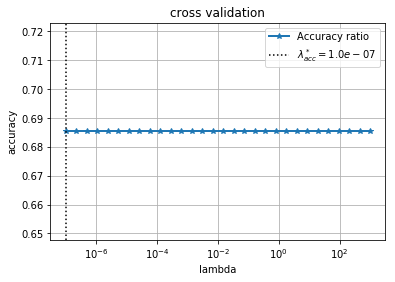

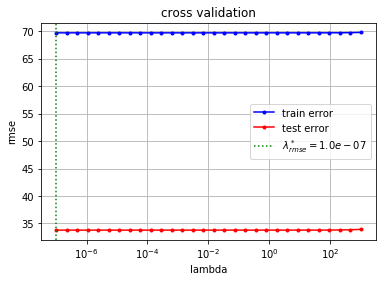

In [67]:
cross_validation_demo()
